# Name: Abhay Sharma
# Roll: 22CH10001

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
class NaiveBayes:

    def __init__(self, K=2):
        self.K = K

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros((n_classes), dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def _calculate_likelihood(self, x, mean, var):
        exponent = np.exp(-(x - mean) ** 2 / (2 * var))
        return (1 / (np.sqrt(2 * np.pi * var))) * exponent

    def _predict_instance(self, x):
        likelihoods = np.zeros(len(self._classes))

        for idx, c in enumerate(self._classes):
            class_prior = np.log(self._priors[idx])
            likelihood = np.sum(np.log(self._calculate_likelihood(x, self._mean[idx, :], self._var[idx, :])))
            likelihoods[idx] = class_prior + likelihood

        return self._classes[np.argmax(likelihoods)]

    def predict(self, X):
        y_pred = [self._predict_instance(x) for x in X]
        return np.array(y_pred)


In [17]:
dataset = pd.read_csv('Iris.csv')
dataset['Species'] = dataset['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Accuracy with 2 bins: 100.00
Accuracy with 3 bins: 100.00
Accuracy with 5 bins: 100.00


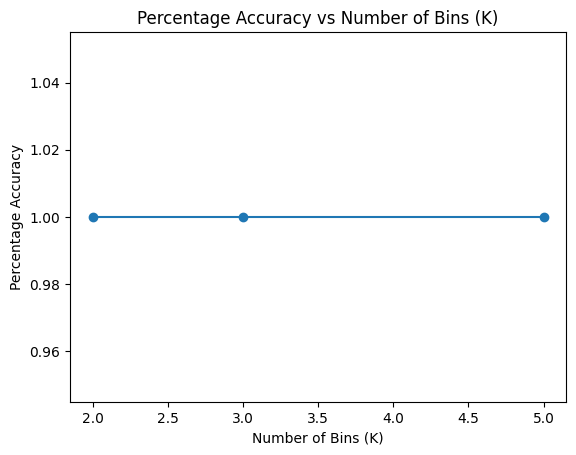

Best value of K: 2 with accuracy 1.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_with_different_bins(X, y, K_values):
    accuracies = []

    for K in K_values:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

        # Train Naive Bayes with current K
        nb_classifier = NaiveBayes(K)
        nb_classifier.fit(X_train, y_train)

        # Make predictions on test data
        y_pred = nb_classifier.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        print(f"Accuracy with {K} bins: {accuracy*100:.2f}")

    # Plot Percentage Accuracy vs K
    plt.plot(K_values, accuracies, marker='o')
    plt.title('Percentage Accuracy vs Number of Bins (K)')
    plt.xlabel('Number of Bins (K)')
    plt.ylabel('Percentage Accuracy')
    plt.show()

    # Find the best value of K
    best_K = K_values[np.argmax(accuracies)]
    print(f"Best value of K: {best_K} with accuracy {max(accuracies)}")

K_values = [2, 3, 5]

# Call the evaluation function
evaluate_with_different_bins(X, y, K_values)


Accuracy with 2 bins and 10.0% noise: 1.0
Accuracy with 3 bins and 10.0% noise: 0.9666666666666667
Accuracy with 5 bins and 10.0% noise: 1.0
Accuracy with 2 bins and 40.0% noise: 0.9333333333333333
Accuracy with 3 bins and 40.0% noise: 1.0
Accuracy with 5 bins and 40.0% noise: 0.9
Accuracy with 2 bins and 80.0% noise: 0.9333333333333333
Accuracy with 3 bins and 80.0% noise: 0.9333333333333333
Accuracy with 5 bins and 80.0% noise: 0.9333333333333333
Accuracy with 2 bins and 90.0% noise: 0.9666666666666667
Accuracy with 3 bins and 90.0% noise: 0.9333333333333333
Accuracy with 5 bins and 90.0% noise: 0.7


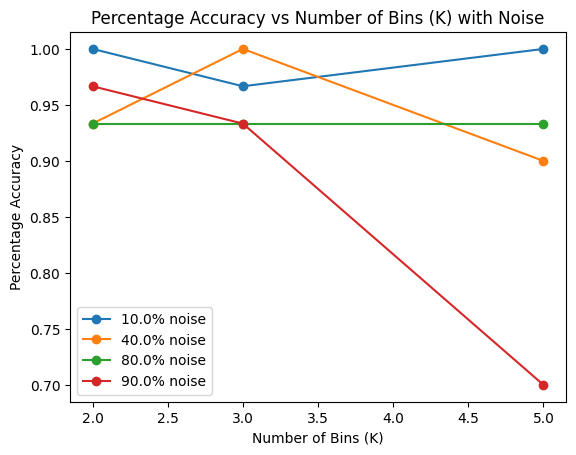

In [19]:
def add_noise(X, fraction, noise_std=2.0):
    num_samples_to_add_noise = int(fraction * len(X))
    noise = np.random.normal(0, noise_std, size=X[:num_samples_to_add_noise].shape)
    X[:num_samples_to_add_noise] += noise
    return X

def evaluate_with_different_bins(X, y, K_values, noise_fractions):
    for noise_fraction in noise_fractions:
        accuracies = []

        for K in K_values:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Add noise to a fraction of the training data
            X_train_noisy = add_noise(X_train.copy(), noise_fraction)

            # Train Naive Bayes with optimal K
            nb_classifier = NaiveBayes(K)
            nb_classifier.fit(X_train_noisy, y_train)

            # Make predictions on test data
            y_pred = nb_classifier.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

            print(f"Accuracy with {K} bins and {noise_fraction * 100}% noise: {accuracy}")

        # Plot Percentage Accuracy vs K for each noise fraction
        plt.plot(K_values, accuracies, marker='o', label=f'{noise_fraction * 100}% noise')

    plt.title('Percentage Accuracy vs Number of Bins (K) with Noise')
    plt.xlabel('Number of Bins (K)')
    plt.ylabel('Percentage Accuracy')
    plt.legend()
    plt.show()

K_values = [2, 3, 5]
noise_fractions = [0.1, 0.4, 0.8, 0.9]

evaluate_with_different_bins(X, y, K_values, noise_fractions)
